In [26]:
#importing libraries 
import cv2
import matplotlib.pyplot as plt 
from matplotlib import ft2font
#importing and using necessary files
config_file=r'C:\Users\kalpesh\Desktop\msc4\ssd_mobilenet_v3_large_coco_2020_01_14.pbtxt' 
frozen_model=r'C:\Users\kalpesh\Desktop\msc4\frozen_inference_graph.pb'
#Tenserflow object detection model
model = cv2.dnn_DetectionModel(frozen_model,config_file)

In [27]:
#Reading Coco dataset 
classLabels=[]
filename=r'C:\Users\kalpesh\Desktop\msc4\coco.names' 
with open(filename,'rt') as fpt:
    classLabels = fpt.read().rstrip('\n').split('\n')

In [28]:
print("Number of Classes") 
print(len(classLabels)) 
print("Class labels") 
print(classLabels)

Number of Classes
80
Class labels
['person', 'bicycle', 'car', 'motorbike', 'aeroplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'sofa', 'pottedplant', 'bed', 'diningtable', 'toilet', 'tvmonitor', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush']


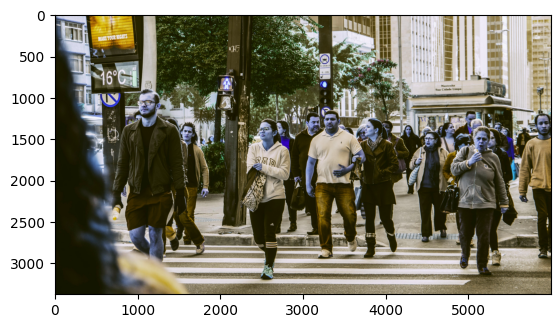

In [29]:
#Model training 
model.setInputSize(320,320) 
model.setInputScale(1.0/127.5) 
model.setInputMean((127.5,127.5,127.5)) 
model.setInputSwapRB(True)
#reading image
img = cv2.imread(r'C:\Users\kalpesh\Desktop\msc4\test.jpg') 
plt.imshow(img)


{1: 10, 3: 0}


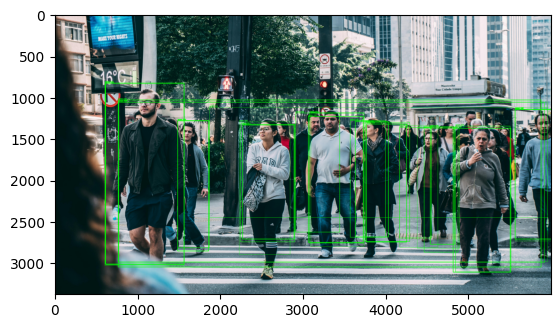

In [32]:
# Define the desired classes
desired_classes = [1, 3]  # Example class indices

ClassIndex, confidence, bbox = model.detect(img, confThreshold=0.5)

# Initialize a dictionary to count the detected classes
class_counts = {class_id: 0 for class_id in desired_classes}

for class_id, conf, box in zip(ClassIndex.flatten(), confidence.flatten(), bbox): 
    if class_id in desired_classes:
        class_counts[class_id] += 1  # Increment counter for the detected class 
        label = f'{classLabels[class_id-1]}: {conf:.2f}'
        cv2.rectangle(img, box, color=(0, 255, 0), thickness=5)
        cv2.putText(img, label, (box[0], box[1] - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0,255, 0),2)

# Display the image with detected objects 
print(class_counts)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)) 
plt.show()
        